# Glass Type Classification with Machine Learning

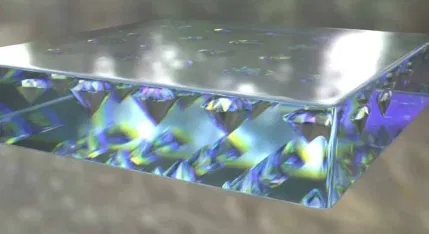

Glass is a fully recyclable and sustainable material used in the fabrication of everything from tableware or windows for the automotive and the construction industries to more technical glass, such as flat screens for smartphones. Demand for glass is on the rise due to population and infrastructure growth. Glass is made in furnaces at very high temperatures with a process that requires constant improvement to meet the energy efficiency and environmental challenges posed by the manufacturing cycle.

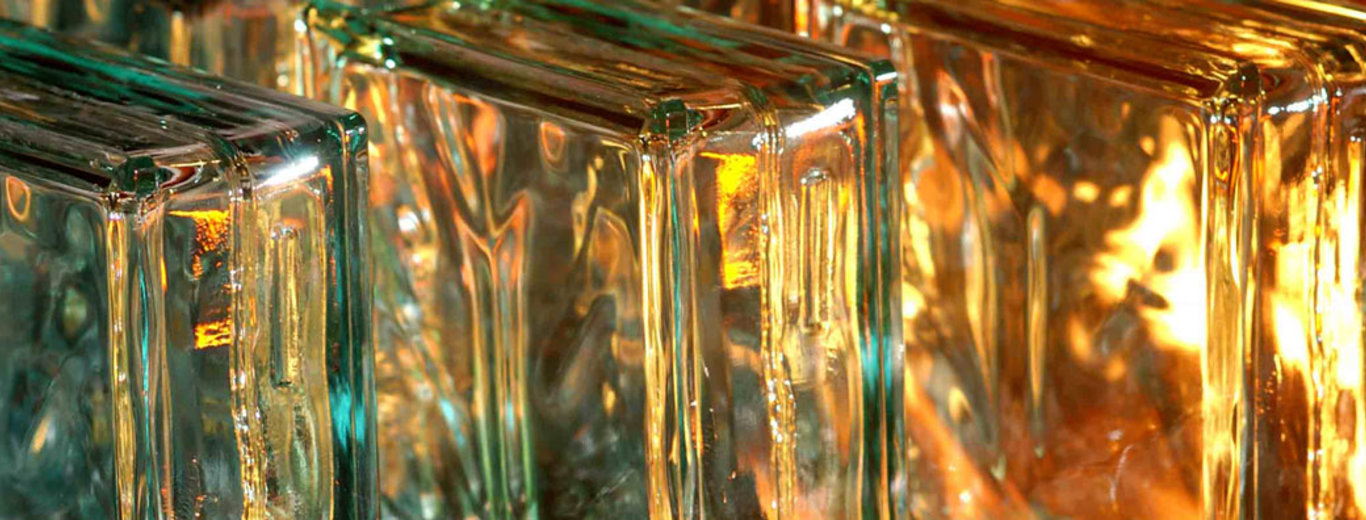

Enhancing efficiency with oxygen Fuel technology
The glass industry is under severe cost constraints and increasing environmental pressure to reduce emissions. Air Liquide provides glass manufacturers with solutions to improve their competitiveness and environmental footprint.

As long standing experts in oxy-combustion, which is the process of burning a fuel using pure oxygen instead of air as the primary oxidant, we have substantial R&D resources and a strong experience in glass making 

# Attribute Information:

1. Id number: 1 to 214 (removed from CSV file)   
2. RI: refractive index    
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)   
4. Mg: Magnesium    
5. Al: Aluminum    
6. Si: Silicon    
7. K: Potassium    
8. Ca: Calcium    
9. Ba: Barium    
10. Fe: Iron    
11. Type of glass: (class attribute)    
    -- 1 buildingwindowsfloatprocessed    
    -- 2 buildingwindowsnonfloatprocessed    
    -- 3 vehiclewindowsfloatprocessed    
    -- 4 vehiclewindowsnonfloatprocessed (none in this database)    
    -- 5 containers    
    -- 6 tableware    
    -- 7 headlamps    

# Importing the Libraries

# Contents

# 1. Loading the Libraries
# 2. Loading the Dataset in to Python environment
# 3. Summarize the data
# 4. Exploratory Data Analysis
# 5. Evaluation of Algorithms
# 6. Algorithm Tuning
# 7. Diagnose the performance of the best Algorithms
# 8. Multiple Models Machine Learning

1. Logistic Regression
2. K Nearest Neighbor Classifier
3. Support Vector Machine (Linear Classifier)
4. Support Vector Machine (RBF Classifier)
5. Gaussian Naive Bayes Classifier
6. Decision Tree Classifier
7. Random Forest Classifier
8. Xgboost Classifier
9. SGD Classifier
10. AdaBoost Classifier
11. Gradient Boosting Classifier
12. Quadratic Discriminant Analysis

 




# Importing the required Libraries

In [1]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import pandas_profiling as pp

# Data Transformation
from sklearn.base import TransformerMixin
from scipy.stats import boxcox

#Preprocessing
from sklearn.preprocessing import FunctionTransformer, StandardScaler

# Dimentionality Reduction
from sklearn.decomposition import PCA
from sklearn. discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Train Test Split Model Selection
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, GridSearchCV, learning_curve, validation_curve

# Streaming Pipelines
from sklearn.pipeline import Pipeline

# Boxcox transformation class
from sklearn.base import BaseEstimator, TransformerMixin
from collections import Counter
import warnings

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier, plot_importance
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from time import time

%matplotlib inline

warnings.filterwarnings('ignore')

sns.set_style('whitegrid')

In [2]:
df = pd.read_csv("C:\\Users\\SHASHI\\OneDrive\\Desktop\\Python\\glass.csv")

In [3]:
df.head(5)

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

In [4]:
df.shape

(214, 10)

In [5]:
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

# Summarization of the data

# Descriptive Statistics

In [6]:
df.describe()

RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516523   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1.000000  
25%      8.240000    0.000000    0.000000    1.000000  
50%      8.600000    0.000000    0.000000    2.000000  
75%      9.172500    0.000000    0.100000    3.000000  
max     16.190000    3.150000    0.510000    7.000000

# Finding the Missing Values

In [7]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [8]:
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [9]:
df['Type'].value_counts().sort_index(ascending=True)

1    70
2    76
3    17
5    13
6     9
7    29
Name: Type, dtype: int64

# Finding Outliers

In [35]:
features = df.drop('Type', axis=1)
y = df['Type']

In [36]:
def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    # iterate over features(columns) 
    for col in df.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        
        # Interquartile rrange (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(features))))

The dataset contains 14 observations with more than 2 outliers


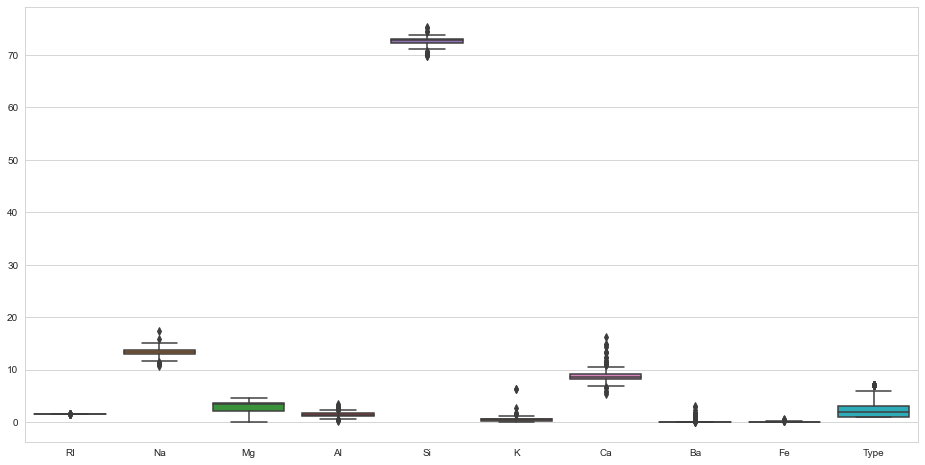

In [37]:
plt.figure(figsize=(16,8))
sns.boxplot(data=df, orient="v")
plt.show()

Si: Silicon: has a mean much superior to the other variables. It is normal since it is a glass mainly based on silica.

<Figure size 1152x576 with 0 Axes>

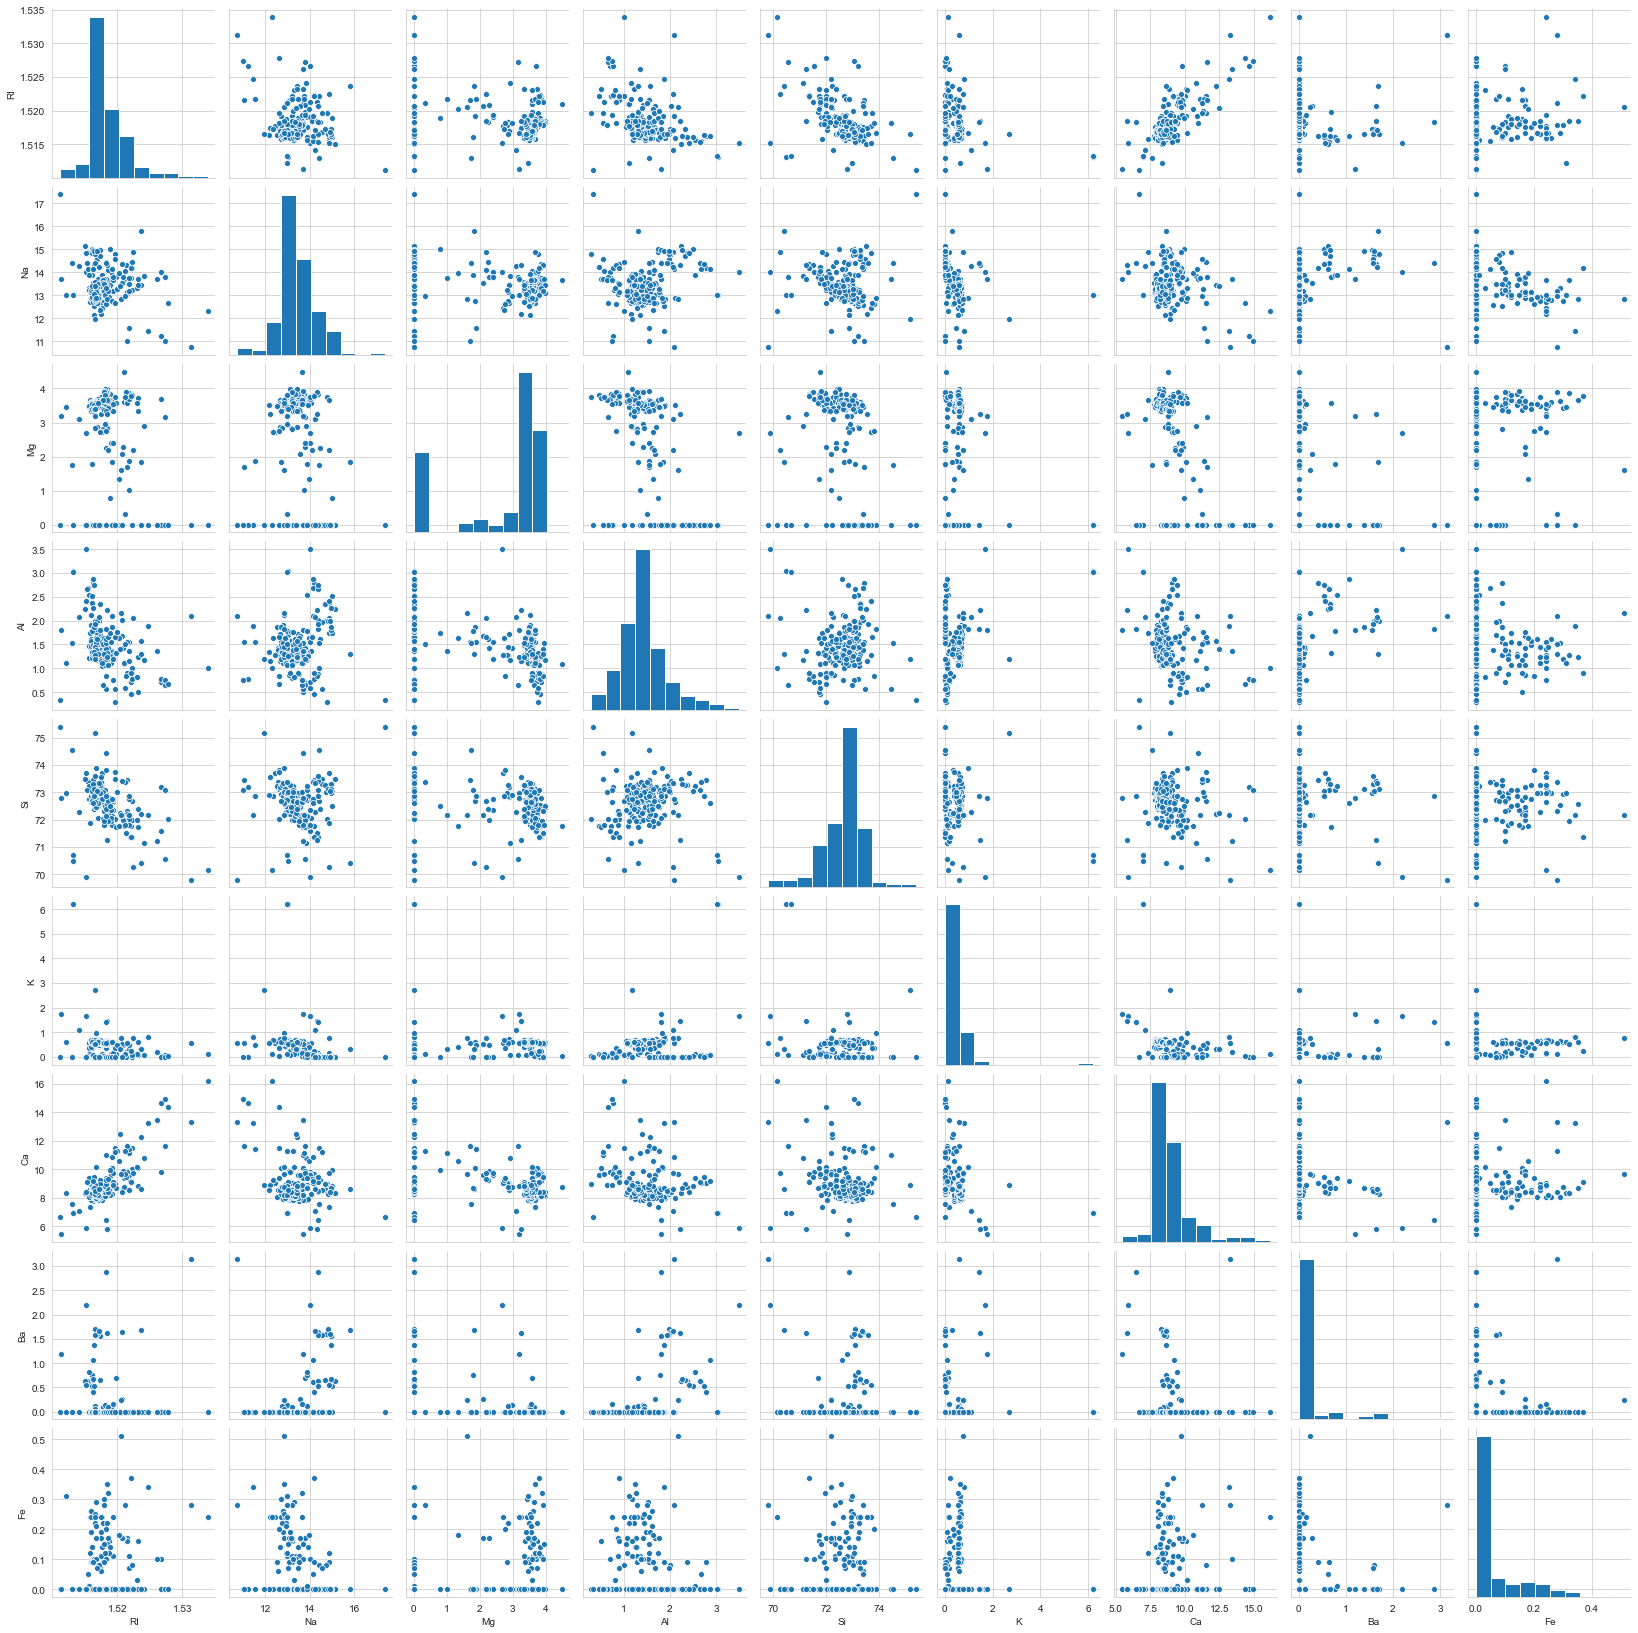

In [38]:
plt.figure(figsize=(16,8))
sns.pairplot(features, palette='dark2')
plt.show()

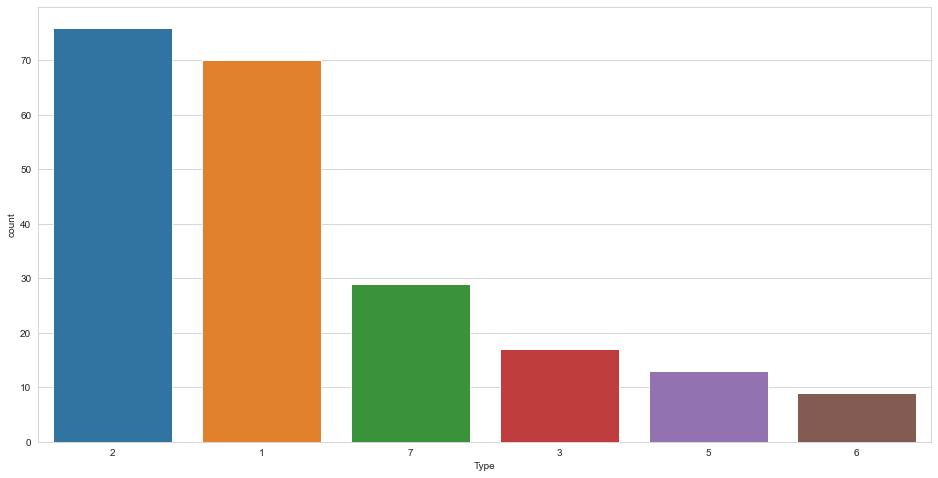

In [42]:
plt.figure(figsize=(16,8))
sns.countplot(x='Type', data=df, order=df['Type'].value_counts().index);

# Finding Outliers

<AxesSubplot:>

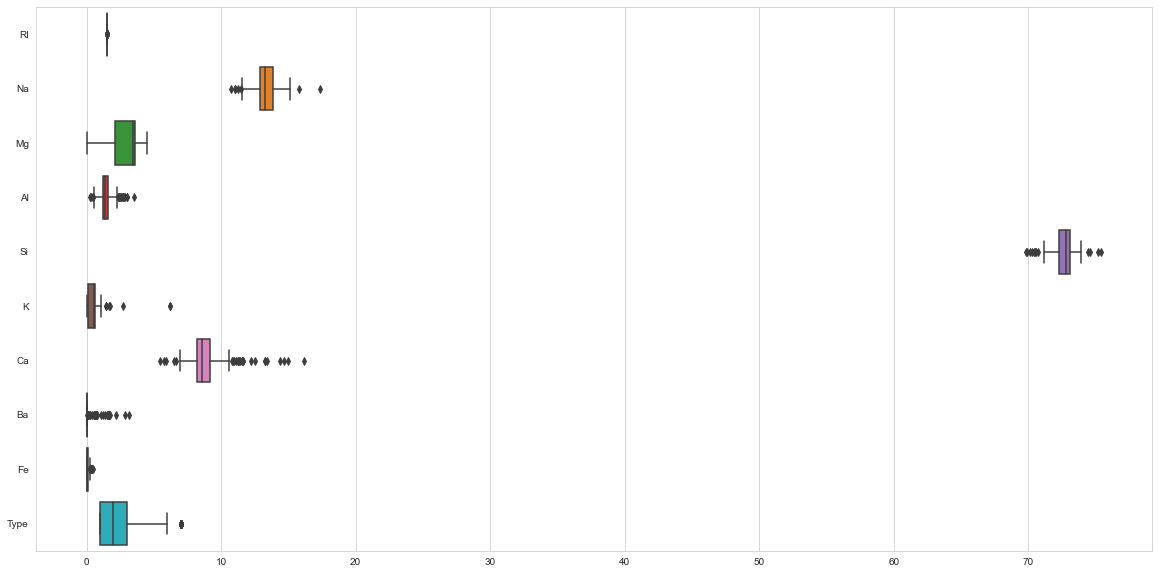

In [44]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df, orient="h")

# Pearson Correlation

<AxesSubplot:>

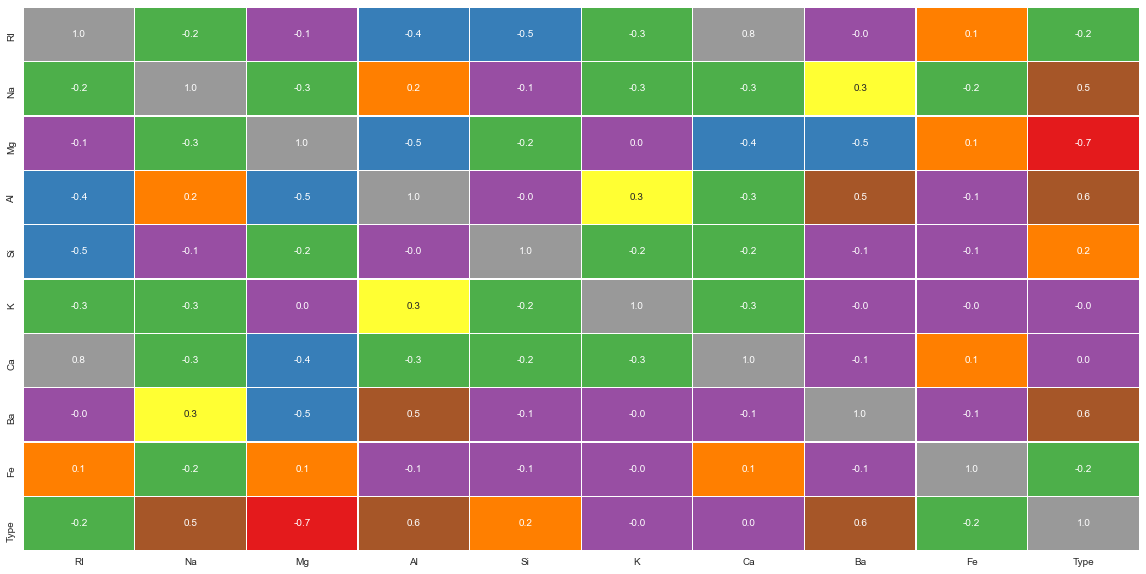

In [45]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(method='pearson'), cbar=False, annot=True, fmt='.1f', linewidths=0.20, cmap='Set1')


In [47]:
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:xlabel='Type', ylabel='count'>

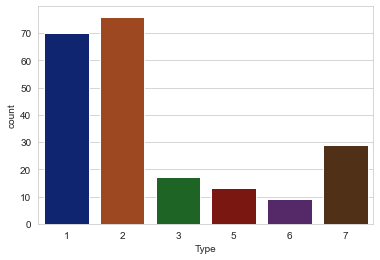

In [50]:
df['Type'].value_counts()
df['Type'].value_counts()*100/len(df)
sns.countplot(x='Type', data=df, palette='dark')

# Train Test and Split the data

In [51]:
X = df.drop('Type',axis=1)
y = df['Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [52]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=27)

In [53]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(171, 9)
(43, 9)
(171,)
(43,)


# Scaling the dataset

In [54]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Data is ready now for Model Building

In [55]:
def models(X_train,y_train):
  
  #Using Logistic Regression Algorithm to the Training Set
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, y_train)
  
  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, y_train)
    
  #Using SVC method of svm class to use Support Vector Machine Algorithm
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state =0)
  svc_lin.fit(X_train, y_train)

  #Using SVC method of svm class to use Kernel SVM Algorithm
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, y_train)

  #Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, y_train)

 

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, y_train)
  
    
  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, y_train)
    
    
    
    
 #Using xgboostClassifier of tree class to use Decision Tree Algorithm
  from xgboost import XGBClassifier 
  xgboost = XGBClassifier(max_depth=5, learning_rate=0.01, n_estimators=100, gamma=0, 
                        min_child_weight=1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.005)
  xgboost.fit(X_train, y_train)
    
    
    
 #Using  SGDClassifierr of tree class to use Decision Tree Algorithm    
  from sklearn.linear_model import SGDClassifier
  SGD = SGDClassifier()
  SGD.fit(X_train, y_train)
    
    
  #Using  AdaBoostClassifier of tree class to use Decision Tree Algorithm    
  from sklearn.ensemble import AdaBoostClassifier
  Ada = AdaBoostClassifier(n_estimators=2000, random_state = 0)
  Ada.fit(X_train, y_train)
   



  #Using  GradientBoostingClassifier of tree class to use Decision Tree Algorithm    
  from sklearn.ensemble import GradientBoostingClassifier
  clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
  clf.fit(X_train, y_train) 

#####
  

 #Using Quadratic Discriminant Analysis of tree class to use Decision Tree Algorithm    
  from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 
  QDA = QuadraticDiscriminantAnalysis ()
  QDA.fit(X_train, y_train)
    

  #print model accuracy on the training data.
  print('[0]Logistic Regression Training Accuracy:', log.score(X_train, y_train)*100)
  print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, y_train)*100)
  print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, y_train)*100)
  print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, y_train)*100)
  print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, y_train)*100)
  print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, y_train)*100)
  print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, y_train)*100)
  print('[7]Xgboost Classifier Training Accuracy:', xgboost.score(X_train, y_train)*100)
  print('[8]SGD Classifier Training Accuracy:', SGD.score(X_train, y_train)*100)
  print('[9]AdaBoost Classifier Training Accuracy:', Ada.score(X_train, y_train)*100)
  print('[10]GradientBoosting Classifier Training Accuracy:', clf.score(X_train, y_train)*100)
  print('[11]Quadratic Discriminant AnalysisTraining Accuracy:', QDA.score(X_train, y_train)*100)

  return log, knn, svc_lin, svc_rbf, gauss,tree,forest,xgboost,SGD,Ada,clf,QDA

model = models(X_train,y_train)

[11:04:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]Logistic Regression Training Accuracy: 72.51461988304094
[1]K Nearest Neighbor Training Accuracy: 73.68421052631578
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 73.68421052631578
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 80.7017543859649
[4]Gaussian Naive Bayes Training Accuracy: 59.06432748538012
[5]Decision Tree Classifier Training Accuracy: 100.0
[6]Random Forest Classifier Training Accuracy: 100.0
[7]Xgboost Classifier Training Accuracy: 94.15204678362574
[8]SGD Classifier Training Accuracy: 65.49707602339181
[9]AdaBoost Classifier Training Accuracy: 59.64912280701754
[10]GradientBoosting Classifier Training Accuracy: 100.0
[11]Quadra

# Lets showcase the confusion matrix and accuracy for the test data

In [56]:
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
  cm = confusion_matrix(y_test, model[i].predict(X_test))
  TN = cm[0][0]
  TP = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]
  print(cm)
  print('Model[{}] Testing Accuracy = "{}!"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
  print()# Print a new line

#Show other ways to get the classification accuracy & other metrics 

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model)):
  print('Model ',i)
  #Check precision, recall, f1-score
  print( classification_report(y_test, model[i].predict(X_test)) )
  #Another way to get the models accuracy on the test data
  print( accuracy_score(y_test, model[i].predict(X_test)))
  print()#Print a new line

[[6 3 0 0 0 0]
 [9 9 0 1 0 0]
 [3 2 0 0 0 0]
 [0 1 0 1 0 0]
 [0 1 0 0 1 0]
 [0 0 0 0 0 6]]
Model[0] Testing Accuracy = "0.5555555555555556!"

[[ 7  2  0  0  0  0]
 [ 8 11  0  0  0  0]
 [ 3  2  0  0  0  0]
 [ 0  1  0  1  0  0]
 [ 0  1  0  0  1  0]
 [ 0  0  0  0  0  6]]
Model[1] Testing Accuracy = "0.6428571428571429!"

[[6 3 0 0 0 0]
 [9 9 0 1 0 0]
 [3 2 0 0 0 0]
 [0 2 0 0 0 0]
 [0 0 0 0 2 0]
 [0 0 0 0 0 6]]
Model[2] Testing Accuracy = "0.5555555555555556!"

[[ 7  2  0  0  0  0]
 [ 7 12  0  0  0  0]
 [ 2  3  0  0  0  0]
 [ 0  1  0  1  0  0]
 [ 0  1  0  0  1  0]
 [ 0  0  0  0  0  6]]
Model[3] Testing Accuracy = "0.6785714285714286!"

[[ 4  3  1  0  1  0]
 [14  3  1  1  0  0]
 [ 3  1  1  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]
Model[4] Testing Accuracy = "0.2916666666666667!"

[[ 6  2  1  0  0  0]
 [ 6 11  1  0  0  1]
 [ 2  2  1  0  0  0]
 [ 0  1  0  1  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]
Model[5] Testing Accuracy = "0.68!"

[[ 7  2  0  0  0  

In [57]:
acc_1 = 0.703703*100 
acc_2 = 0.685185*100
acc_3 = 0.666666*100
acc_4 = 0.759259*100
acc_5 = 0.537037*100
acc_6 = 0.648148*100
acc_7 = 0.796296*100
acc_8 = 0.814814*100
acc_9 = 0.592592*100
acc_10 = 0.61111*100
acc_11 = 0.81481*100
acc_12 = 0.64814*100
results = pd.DataFrame([["Logistic Regression",acc_1],["Nearest Neighbor",acc_2],["Support Vector Machine (Linear Classifier)",acc_3],
                       ["Support Vector Machine (RBF Classifier)",acc_4],["Gaussian Naive Bayes",acc_5],["Decision Tree Classifier",acc_6],
                       ["Random Forest Classifier",acc_7],["Xgboost Classifier",acc_8],["SGD Classifier ",acc_9],["AdaBoost Classifier",acc_10],
                        ["GradientBoosting Classifier",acc_11],["Quadratic Discriminant Analysis",acc_12],
                       ],columns = ["Models","Accuracy Score"]).sort_values(by='Accuracy Score',ascending=False)
results.style.background_gradient(cmap='Blues')